# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [84]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1


Beginning Data Retrieval     
-----------------------------


In [5]:

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | iqaluit
Processing Record 3 of Set 1 | kaedi
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | gobabis
Processing Record 6 of Set 1 | tiksi
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | bodo
Processing Record 9 of Set 1 | udachny
Processing Record 10 of Set 1 | extrema
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | ilebo
Processing Record 13 of Set 1 | filadelfia
Processing Record 14 of Set 1 | pauini
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | haiku-pauwela
Processing Record 17 of Set 1 | qaqortoq
Processing Record 18 of Set 1 | san antonio de pale
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | port lincoln
Processing Record 21 of Set 1 | san patricio
Processing Record 22 of Set 1 | puerto natales
Processing Record 23 of Set 1 | haimen
Processing Record 24 of Set 1 |

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,20.24,86,100,4.92,US,1707995354
1,iqaluit,63.7506,-68.5145,-16.32,97,100,2.56,CA,1707995179
2,kaedi,16.1465,-13.5047,33.62,6,100,5.13,MR,1707995355
3,bilibino,68.0546,166.4372,-33.97,100,98,0.19,RU,1707995356
4,gobabis,-22.4500,18.9667,34.98,13,46,3.53,NA,1707995286


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [85]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,20.24,86,100,4.92,US,1707995354
1,iqaluit,63.7506,-68.5145,-16.32,97,100,2.56,CA,1707995179
2,kaedi,16.1465,-13.5047,33.62,6,100,5.13,MR,1707995355
3,bilibino,68.0546,166.4372,-33.97,100,98,0.19,RU,1707995356
4,gobabis,-22.4500,18.9667,34.98,13,46,3.53,NaN,1707995286


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [86]:
# Define axis for further reference
lat_axis = city_data_df['Lat']
lon_axis = city_data_df['Lng']
temp_axis = city_data_df['Max Temp']
hum_axis = city_data_df['Humidity']
cloud_axis = city_data_df['Cloudiness']
wind_axis = city_data_df['Wind Speed']

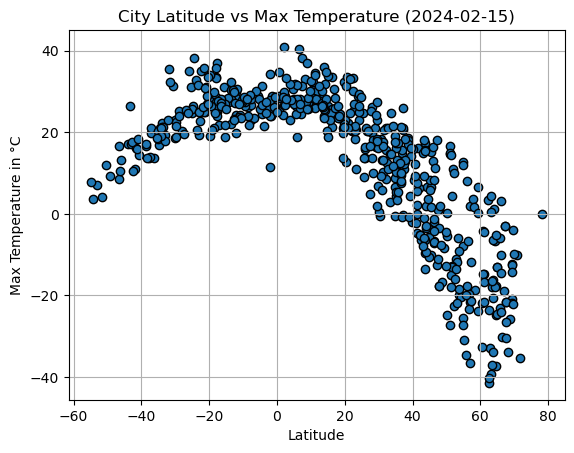

In [87]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lat_axis,temp_axis, edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature in °C')
plt.title('City Latitude vs Max Temperature (2024-02-15)')

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

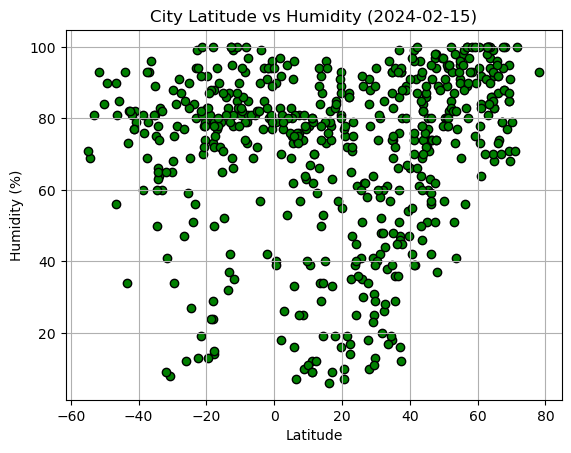

In [88]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lat_axis,hum_axis, facecolors = 'green', edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity (2024-02-15)')

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

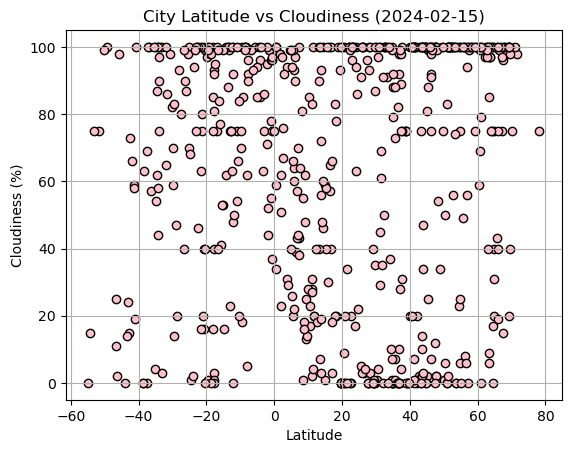

In [89]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lat_axis,cloud_axis, facecolors = 'pink', edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (2024-02-15)')

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

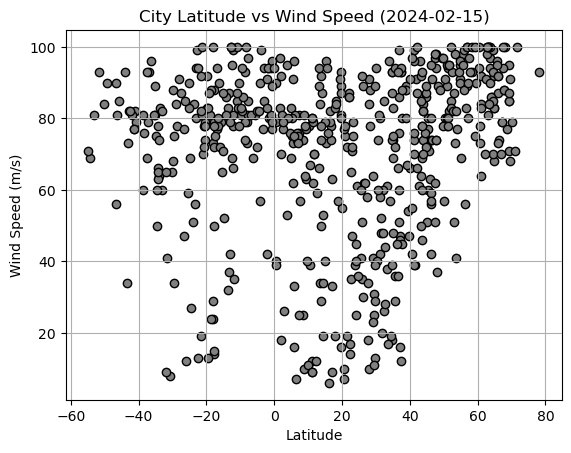

In [90]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lat_axis,hum_axis, facecolors = 'grey', edgecolors='black')

# Incorporate the other graph properties
plt.grid(True)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs Wind Speed (2024-02-15)')

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [173]:
# Define a function to create Linear Regression plots
def create_reg_line(x_values, y_values, position, fig_name, dot_color, ylabel, title):
    
    # Calculate values for the regression line
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Plot the regression line
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,position,fontsize=15,color="red") 
    
    # Build scatter plot
    plt.scatter(x_values,y_values,facecolor=dot_color)

    # Incorporate the other graph properties
    plt.xlabel('Latitude')
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Save the figure
    plt.savefig(f"../output_data/{fig_name}.png")
    
    # Print the r value
    print(f"The r-value is: {rvalue}")
    
    # Show plot
    plt.show()

In [92]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,20.24,86,100,4.92,US,1707995354
1,iqaluit,63.7506,-68.5145,-16.32,97,100,2.56,CA,1707995179
2,kaedi,16.1465,-13.5047,33.62,6,100,5.13,MR,1707995355
3,bilibino,68.0546,166.4372,-33.97,100,98,0.19,RU,1707995356
5,tiksi,71.6872,128.8694,-35.38,100,98,1.26,RU,1707995357


In [93]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,gobabis,-22.4500,18.9667,34.98,13,46,3.53,NaN,1707995286
6,port-aux-francais,-49.3500,70.2167,9.32,90,100,17.44,TF,1707995357
9,extrema,-22.8547,-46.3183,19.25,99,100,1.34,BR,1707995359
10,grytviken,-54.2811,-36.5092,3.77,69,15,7.23,GS,1707995147
11,ilebo,-4.3167,20.5833,31.43,57,96,0.19,CD,1707995359


###  Temperature vs. Latitude Linear Regression Plot

In [94]:
# Define Northern Hemisphere axis for easy reference
north_lat_axis = northern_hemi_df['Lat']
north_temp_axis = northern_hemi_df['Max Temp']
north_hum_axis = northern_hemi_df['Humidity']
north_cloud_axis = northern_hemi_df['Cloudiness']
north_wind_axis = northern_hemi_df['Wind Speed']
# Define Southern Hemisphere axis
south_lat_axis = southern_hemi_df['Lat']
south_temp_axis = southern_hemi_df['Max Temp']
south_hum_axis = southern_hemi_df['Humidity']
south_cloud_axis = southern_hemi_df['Cloudiness']
south_wind_axis = southern_hemi_df['Wind Speed']

The r-value is: -0.8664846613166283


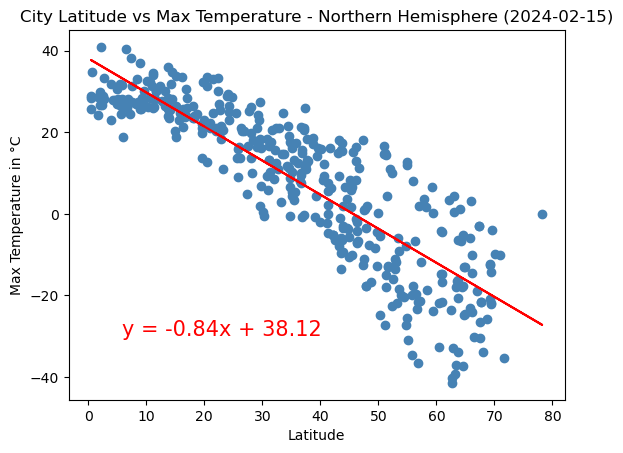

In [178]:
# Linear regression on Northern Hemisphere
create_reg_line(north_lat_axis, north_temp_axis,(5.8,-30), 'FigReg1', 'steelblue', 'Max Temperature in °C','City Latitude vs Max Temperature - Northern Hemisphere (2024-02-15)' )

The r-value is: 0.6429061997436009


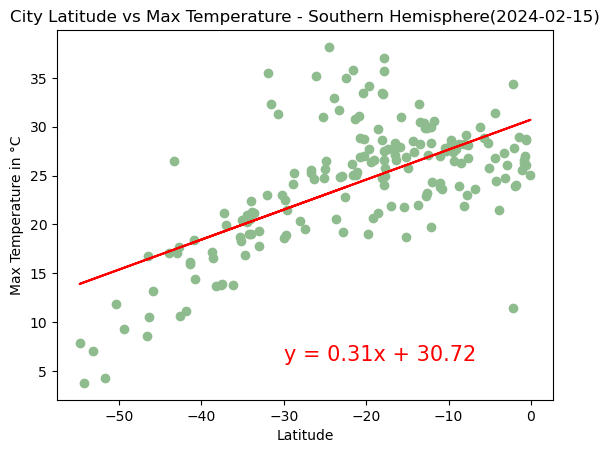

In [176]:
# Linear regression on Southern Hemisphere
create_reg_line(south_lat_axis, south_temp_axis,(-30,6), 'FigReg2','darkseagreen', 'Max Temperature in °C','City Latitude vs Max Temperature - Southern Hemisphere(2024-02-15)')

**Discussion about the linear relationship:** <br>
* In the **Northern Hemisphere**, the r value indicates a strong negative relationship, confirmed by the graph. It is highly likely that a city located at a higher latitude will present lower max temperatures than those located at a lower latitude.<br><br>
* In the **Southern Hemisphere** happens the opposite. The r value of 0.64 (rounded) and the distribution of the datapoints indicate a moderate (almost strong) positive relationship, meaning that for higher latitudes we shall see cities with warmer weather.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3978383304568666


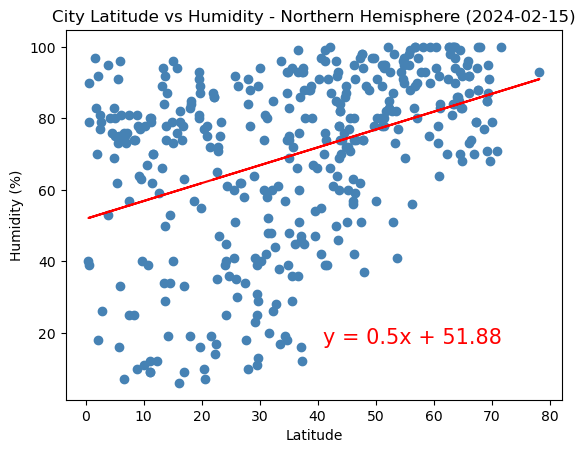

In [179]:
# Linear regression on Northern Hemisphere
create_reg_line(north_lat_axis,north_hum_axis,(41,17),'FigReg3','steelblue','Humidity (%)','City Latitude vs Humidity - Northern Hemisphere (2024-02-15)')

The r-value is: 0.12562716954817996


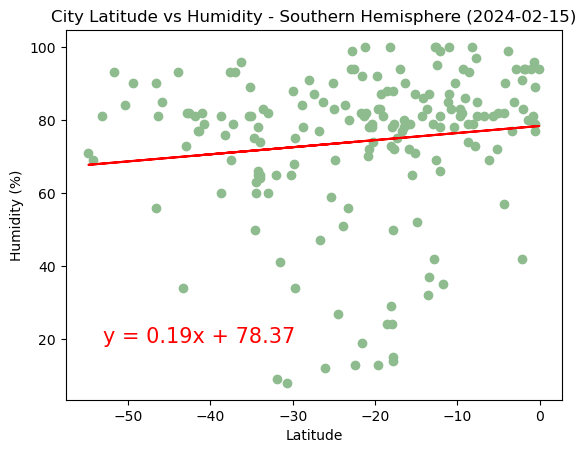

In [186]:
# Linear regression on Southern Hemisphere
create_reg_line(south_lat_axis, south_hum_axis, (-53,19), 'FigReg4', 'darkseagreen', 'Humidity (%)', 'City Latitude vs Humidity - Southern Hemisphere (2024-02-15)')

**Discussion about the linear relationship:** <br>
* In the **Northern Hemisphere**, the r value indicates a weak to moderate positive relationship, confirmed by the graph. We can expect that a city located at a higher latitude will present higher humidity rates, however, we will see many cities that don't follow that.<br><br>
* In the **Southern Hemisphere** there is almost none relationship. The high number of outliers compromise the establishment of any relationship between the variables.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.17231866544584182


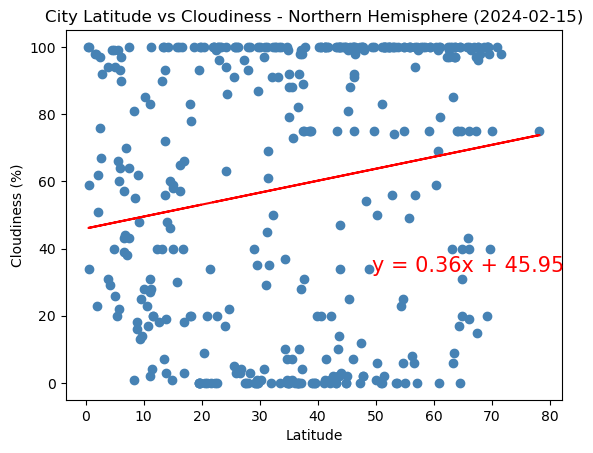

In [187]:
# Linear regression on Northern Hemisphere
create_reg_line(north_lat_axis, north_cloud_axis, (49.3,33), 'FigReg5', 'steelblue', 'Cloudiness (%)', 'City Latitude vs Cloudiness - Northern Hemisphere (2024-02-15)')

The r-value is: 0.2466177394760397


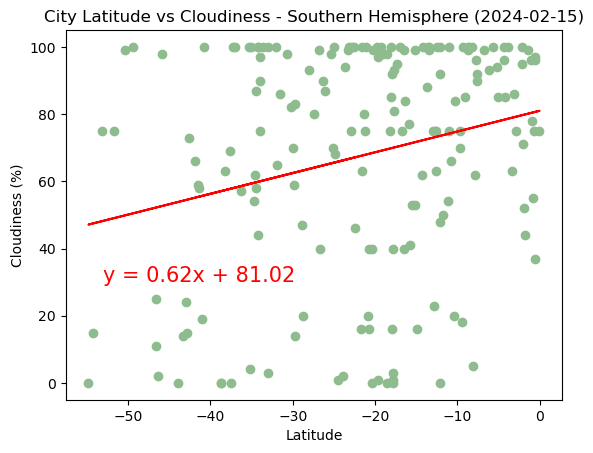

In [189]:
# Linear regression on Southern Hemisphere
create_reg_line(south_lat_axis, south_cloud_axis, (-53, 30), 'FigReg6', 'darkseagreen', 'Cloudiness (%)', 'City Latitude vs Cloudiness - Southern Hemisphere (2024-02-15)')

**Discussion about the linear relationship:** <br>
* In the **Northern Hemisphere**, the r value indicates a weak positive relationship. We will see random results with a very slight trend to find higher cloudiness percentages in cities located in higher latitude.<br><br>
* In the **Southern Hemisphere**, even though the r value is higher, the relationship is still weak. But we will see a bit more cloudiness in the cities located in higher latitude as a whole.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04300434317629805


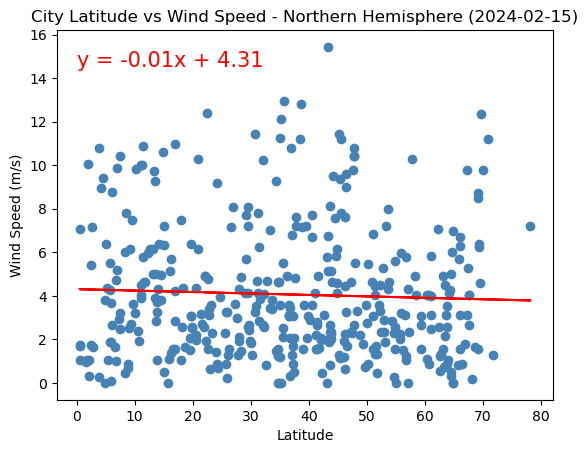

In [191]:
# Linear regression on Northern Hemisphere
create_reg_line(north_lat_axis, north_wind_axis, (0,14.5), 'FigReg7', 'steelblue', 'Wind Speed (m/s)', 'City Latitude vs Wind Speed - Northern Hemisphere (2024-02-15)')

The r-value is: -0.19167861147930962


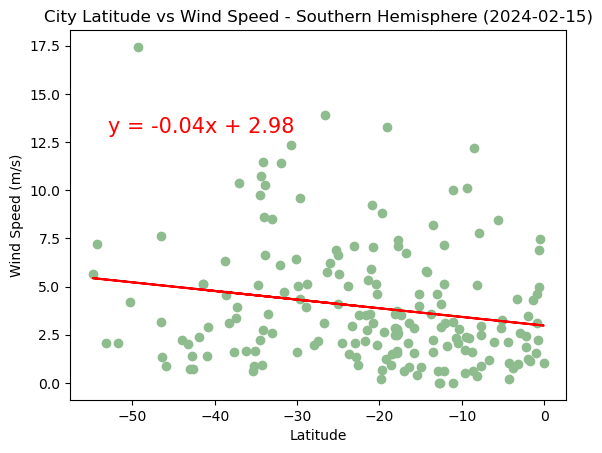

In [193]:
# Linear regression on Southern Hemisphere
create_reg_line(south_lat_axis, south_wind_axis, (-53, 13), 'FigReg8', 'darkseagreen', 'Wind Speed (m/s)', 'City Latitude vs Wind Speed - Southern Hemisphere (2024-02-15)')

**Discussion about the linear relationship:**  <br>
* In the **Northern Hemisphere**, there is no relationship between latitude and wind speed. A r value of approx. -0.04 is insignificant and doesn't indicate any pattern.<br><br>
* In the **Southern Hemisphere**, there is a very weak negative relationship. There is a higher chance of finding stronger winds in cities located at lower latitude, even though there are a significant number of cities that contradict this scenario.